<a href="https://colab.research.google.com/github/MauriChocho/Analisis_vaca_muerta/blob/main/analisis_vaca_muerta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importacion de librerias y carga de archivos





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
from google.colab import userdata

# --- 1. CONFIGURACIÓN DE KAGGLE ---
# Asegúrate de tener KAGGLE_USER y KAGGLE_KEY en la llave (Secrets) de Colab
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USER')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# Descargamos el dataset (esto crea un zip en la carpeta actual)
dataset_slug = "mauriciochocholacek/produccion-vaca-muerta-2010-2025"
!kaggle datasets download -d {dataset_slug}

# Descomprimimos en una carpeta local 'data'
if not os.path.exists('data'):
    os.makedirs('data')
!unzip -o {dataset_slug.split('/')[-1]}.zip -d data/

# --- 2. IDENTIFICACIÓN DE ARCHIVOS ---
# Ahora la ruta es relativa a la carpeta 'data' que acabamos de crear
archivos = glob.glob('data/*.csv')
print(f"✅ Se encontraron {len(archivos)} archivos en la carpeta local para procesar.")

# --- 3. CARGA Y CONSOLIDACIÓN---
columnas_interes = [
    'idpozo', 'anio', 'mes', 'empresa', 'prod_pet', 'prod_gas', 'prod_agua',
    'iny_agua', 'iny_gas', 'tef', 'tipoextraccion', 'tipoestado',
    'tipopozo', 'formacion', 'areayacimiento','profundidad', 'cuenca', 'provincia',
    'tipo_de_recurso'
]

lista_df = []

for archivo in archivos:
    try:
        # Detectamos columnas reales
        temp_header = pd.read_csv(archivo, sep=None, engine='python', nrows=0)
        columnas_reales = temp_header.columns.tolist()

        # Match de columnas
        columnas_a_cargar = [c for c in columnas_interes if c in columnas_reales]

        # Carga con filtros
        df_temp = pd.read_csv(archivo, sep=None, engine='python', usecols=columnas_a_cargar)

        # Filtro de Neuquén
        if 'provincia' in df_temp.columns:
            df_temp = df_temp[df_temp['provincia'].str.contains('Neuquén', case=False, na=False)]

        lista_df.append(df_temp)
        print(f"✔ Procesado: {os.path.basename(archivo)} ({len(df_temp):,} filas)")

    except Exception as e:
        print(f"❌ Error en {os.path.basename(archivo)}: {e}")

# Unión final
if lista_df:
    df_final = pd.concat(lista_df, ignore_index=True)
    print(f"\n🚀 ¡Éxito! Dataset consolidado con {len(df_final):,} filas.")
else:
    print("\n💀 No se pudo cargar ningún archivo.")

Dataset URL: https://www.kaggle.com/datasets/mauriciochocholacek/produccion-vaca-muerta-2010-2025
License(s): MIT
produccion-vaca-muerta-2010-2025.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  produccion-vaca-muerta-2010-2025.zip
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2010.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2011.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2012.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2013.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2014.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2015.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2016.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2017.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2018.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2019.csv  
  inflating: data/produccin-de-pozos-de-gas-y-petrleo-2020.csv  
  in

## Carga de archivos

In [3]:

# Define la ruta donde están tus CSVs
# Si los subiste a una carpeta llamada 'datos_petroleo'
ruta = '/content/drive/MyDrive/ProdPozos/*.csv'

# 1. Obtenemos la lista de todos los nombres de archivos
archivos = glob.glob(ruta)
print(f"Se encontraron {len(archivos)} archivos para procesar.")

Se encontraron 16 archivos para procesar.


##Exploración del dataset

In [4]:
print('INFORMACION:')
print('-'*50)
print('-'*50)
print('Tipos de Datos:\n')
df_final.info()
print('-'*50)
print('Estadisticos en variables representativas:\n')
#Todas mis variables se miden en m3 salvo Tiempo efectivo de funcionamiento(tef) dias,y profundidad metros
df_final[['prod_pet','prod_agua','iny_agua','iny_gas','tef','profundidad']].describe()

INFORMACION:
--------------------------------------------------
--------------------------------------------------
Tipos de Datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040122 entries, 0 to 3040121
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   anio             int64  
 1   mes              int64  
 2   idpozo           int64  
 3   prod_pet         float64
 4   prod_gas         float64
 5   prod_agua        float64
 6   iny_agua         float64
 7   iny_gas          float64
 8   tef              float64
 9   tipoextraccion   object 
 10  tipoestado       object 
 11  tipopozo         object 
 12  empresa          object 
 13  profundidad      float64
 14  formacion        object 
 15  areayacimiento   object 
 16  cuenca           object 
 17  provincia        object 
 18  tipo_de_recurso  object 
dtypes: float64(7), int64(3), object(9)
memory usage: 440.7+ MB
--------------------------------------------------
Estadistic

,prod_pet,prod_agua,iny_agua,iny_gas,tef,profundidad
count,3.040122e+06,3.040122e+06,3.040122e+06,3.040122e+06,3.040122e+06,3.040122e+06
mean,5.748832e+01,3.724236e+02,4.049190e+02,8.350488e-01,1.233762e+01,1.842514e+03
std,3.364966e+02,1.282792e+03,1.874560e+03,2.038200e+02,1.450615e+01,1.078817e+03
min,-4.600000e-01,-1.211000e+01,-2.645100e+02,0.000000e+00,-2.300000e+01,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.131000e+03
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.449000e+03
75%,9.309986e+00,1.798000e+01,0.000000e+00,0.000000e+00,2.995800e+01,2.520000e+03
max,2.659326e+04,8.023930e+04,4.327840e+05,2.197017e+05,9.990000e+02,8.376000e+03


In [5]:
df_final['tipopozo'].replace({np.nan:'Otro tipo'}, inplace=True)
df_final['tipopozo'].unique()

/tmp/ipython-input-859913669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['tipopozo'].replace({np.nan:'Otro tipo'}, inplace=True)


array(['Petrolífero', 'Otro tipo', 'Inyección de Agua', 'Gasífero',
       'Sumidero', 'Inyección de Gas', 'Acuífero',
       'Monitoreo de almacenamiento'], dtype=object)

###Eliminamos notación cientifica para claridad de valores

In [7]:
#Eliminamos notacion cientifica
pd.options.display.float_format = '{:,.2f}'.format
from matplotlib.ticker import StrMethodFormatter

##Analizamos valores negativos

In [8]:
#Chequeamos columnas 'prod_pet', 'prod_agua', 'iny_agua', 'tef'

print(f"Valores negativos en 'prod_pet': {(df_final['prod_pet'] < 0).sum()}")
print(f"Valores negativos en 'prod_agua': {(df_final['prod_agua'] < 0).sum()}")
print(f"Valores negativos en 'iny_agua': {(df_final['iny_agua'] < 0).sum()}")
print(f"Valores negativos en 'tef': {(df_final['tef'] < 0).sum()}")



Valores negativos en 'prod_pet': 7
Valores negativos en 'prod_agua': 10
Valores negativos en 'iny_agua': 1
Valores negativos en 'tef': 6


###Reemplazo de negativos

In [9]:
#Como son pocos valores los reemplazaremos por 0 con metodo de pandas .clip.
df_final['prod_pet'] = df_final['prod_pet'].clip(lower=0)
df_final['prod_agua'] = df_final['prod_agua'].clip(lower=0)
df_final['iny_agua'] = df_final['iny_agua'].clip(lower=0)
df_final['tef'] = df_final['tef'].clip(lower=0)

#KPIs

##Produccion recursos


###Producción total durante 15 años


In [10]:
## Petróleo
total_prod_pet_m3 = df_final['prod_pet'].sum() #m3
total_prod_pet_barril=((total_prod_pet_m3)*6.29)/1000000
total_prod_pet_barril.round(2) #convertir a miles de barriles para mejor lectura

## Gás
total_prod_gas_m3= (df_final['prod_gas'].sum()/1000) #m3

#Producción
print(f"Desde 2010 a 2025 se produjeron {total_prod_pet_barril.round(2)} millones de barriles de petróleo.")

print(f"Desde 2010 a 2025 se produjeron {total_prod_gas_m3.round(2)} millones de m3 de gas.")

Desde 2010 a 2025 se produjeron 1099.31 millones de barriles de petróleo.
Desde 2010 a 2025 se produjeron 395362.66 millones de m3 de gas.


###Promedio de producción diaria

In [11]:
bopd_pet=(total_prod_pet_barril*1000)/5844
bopd_gas=(total_prod_gas_m3)/5844

print(f"BOPD Petroleo: {bopd_pet.round(2)} Barriles/dia") #Barrels of oil per day
print(f"MCFD Gas: {bopd_gas.round(2)} millones de m3/dia")

BOPD Petroleo: 188.11 Barriles/dia
MCFD Gas: 67.65 millones de m3/dia


### KPI Caudal operativo

In [12]:
# Suma total de producción / Suma total de días operativos (TEF)
caudal_operativo_pet = df_final['prod_pet'].sum() / df_final['tef'].sum()
caudal_operativo_gas = df_final['prod_gas'].sum() / df_final['tef'].sum()

print(f"Caudal operativo Petróleo: {caudal_operativo_pet.round(2)} m3/día")
print(f"Caudal operativo Gas: {caudal_operativo_gas.round(2)} m3/dia")

Caudal operativo Petróleo: 4.66 m3/día
Caudal operativo Gas: 10.54 m3/dia


### Cual es la eficiencia operativa de la cuenca?

In [13]:
# 1. Asegurarnos de tener los días reales del mes (Enero=31, Feb=28, etc.)
df_final['dias_mes'] = pd.to_datetime(
    df_final['anio'].astype(str) + '-' + df_final['mes'].astype(str) + '-01'
).dt.days_in_month

# 2. Corregir los que claramente están en HORAS (entre 32 y 744 horas)
# Los dividimos por 24 para pasarlos a DÍAS
mask_horas = (df_final['tef'] > 31) & (df_final['tef'] <= 744)
df_final.loc[mask_horas, 'tef'] = df_final.loc[mask_horas, 'tef'] / 24

# 3. Limitar el resto:
# Si el TEF es > días del mes, lo igualamos al máximo posible del mes.
df_final['tef'] = df_final.apply(
    lambda x: x['dias_mes'] if x['tef'] > x['dias_mes'] else x['tef'], axis=1
)

# 4. Calculamos la Eficiencia Operativa real (0% a 100%)
df_final['eficiencia_op'] = (df_final['tef'] / df_final['dias_mes']) * 100

print(f"La cuenca neuquina tiene una eficiencia operativo promedio de {(df_final[df_final['prod_pet'] > 0]['eficiencia_op'].mean()).round(2)}% en pozos ACTIVOS ")

La cuenca neuquina tiene una eficiencia operativo promedio de 92.04% en pozos ACTIVOS 


#Top años de producción

## Producción Petróleo

###Top 5 Yacimientos que mas aportan

In [14]:

top5_prod_yacimientos = df_final.groupby('areayacimiento')['prod_pet'].sum().nlargest(5).reset_index()
top5_prod_yacimientos

,areayacimiento,prod_pet
0,LOMA CAMPANA-LLL,"23,928,910.96"
1,LA AMARGA CHICA,"17,429,387.65"
2,BANDURRIA SUR,"11,534,611.78"
3,EL TRAPIAL,"11,409,876.26"
4,LOMA CAMPANA,"9,610,582.62"


### Grafico-Producción de Petróleo Mensual en Neuquén (2010-2025)

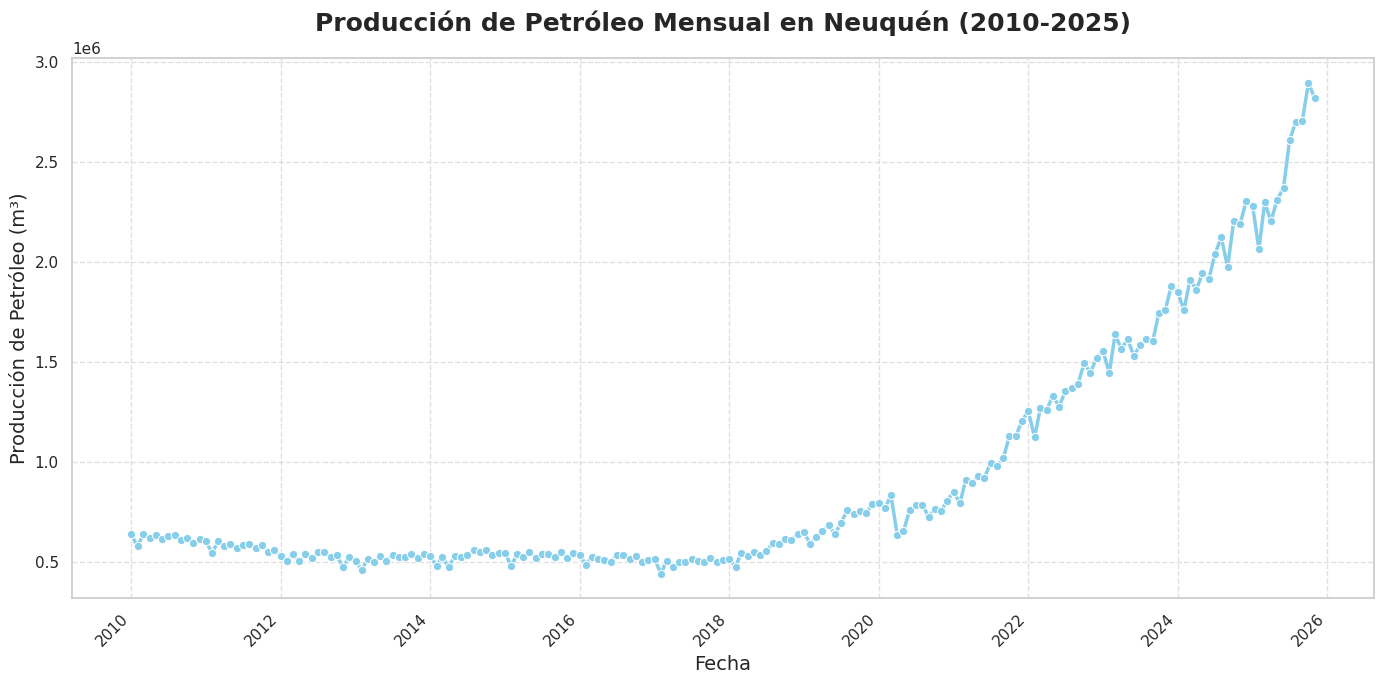

In [15]:
# 1. Agrupar la producción de petróleo por año y mes
prod_pet_mensual = df_final.groupby(['anio', 'mes'])['prod_pet'].sum().reset_index()

# 2. Crear una columna de fecha para el eje X
prod_pet_mensual['fecha'] = pd.to_datetime(prod_pet_mensual['anio'].astype(str) + '-' + prod_pet_mensual['mes'].astype(str) + '-01')

# 3. Ordenar por fecha para asegurar la correcta visualización de la serie temporal
prod_pet_mensual = prod_pet_mensual.sort_values('fecha')

# 4. Configurar el estilo del gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# 5. Crear el gráfico de línea
sns.lineplot(x='fecha', y='prod_pet', data=prod_pet_mensual, marker='o', color='skyblue', linewidth=2.5)

# 6. Personalizar el gráfico
plt.title('Producción de Petróleo Mensual en Neuquén (2010-2025)', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Producción de Petróleo (m³)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Grafico-Top 5 empresas productoras petroleo


/tmp/ipython-input-1666368790.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


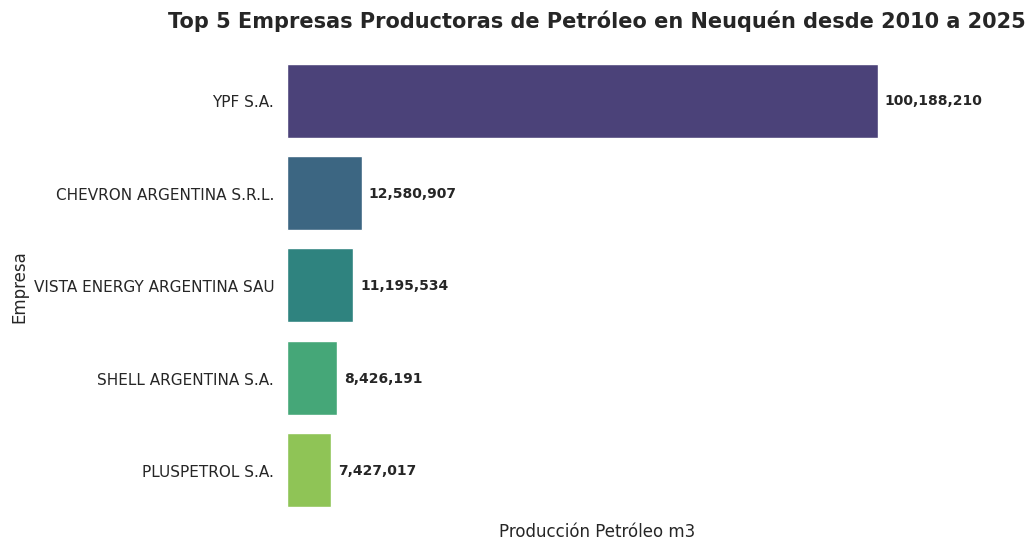

In [16]:
# Total de petroleo por compania, top 5
top5_prod_companies = df_final.groupby('empresa')['prod_pet'].sum().nlargest(5).reset_index()

# 1. Configurar el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# 2. Crear el gráfico de barras
ax = sns.barplot(
    x="prod_pet",
    y="empresa",
    data=top5_prod_companies,
    palette="viridis"
)
# 3. Personalización "LinkedIn Ready"
plt.title('Top 5 Empresas Productoras de Petróleo en Neuquén desde 2010 a 2025', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Producción Petróleo m3', fontsize=12)
plt.ylabel('Empresa', fontsize=12)


ax.set_xticks([]) # Borra los números del eje X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Añadir las etiquetas de datos al final de cada barra para mayor claridad
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, fontweight='bold')

    # Quitar los bordes innecesarios para un look más limpio
sns.despine(left=True, bottom=True)

## Produccion gas



### Grafico-Producción de Gas Mensual en Neuquén (2010-2025)

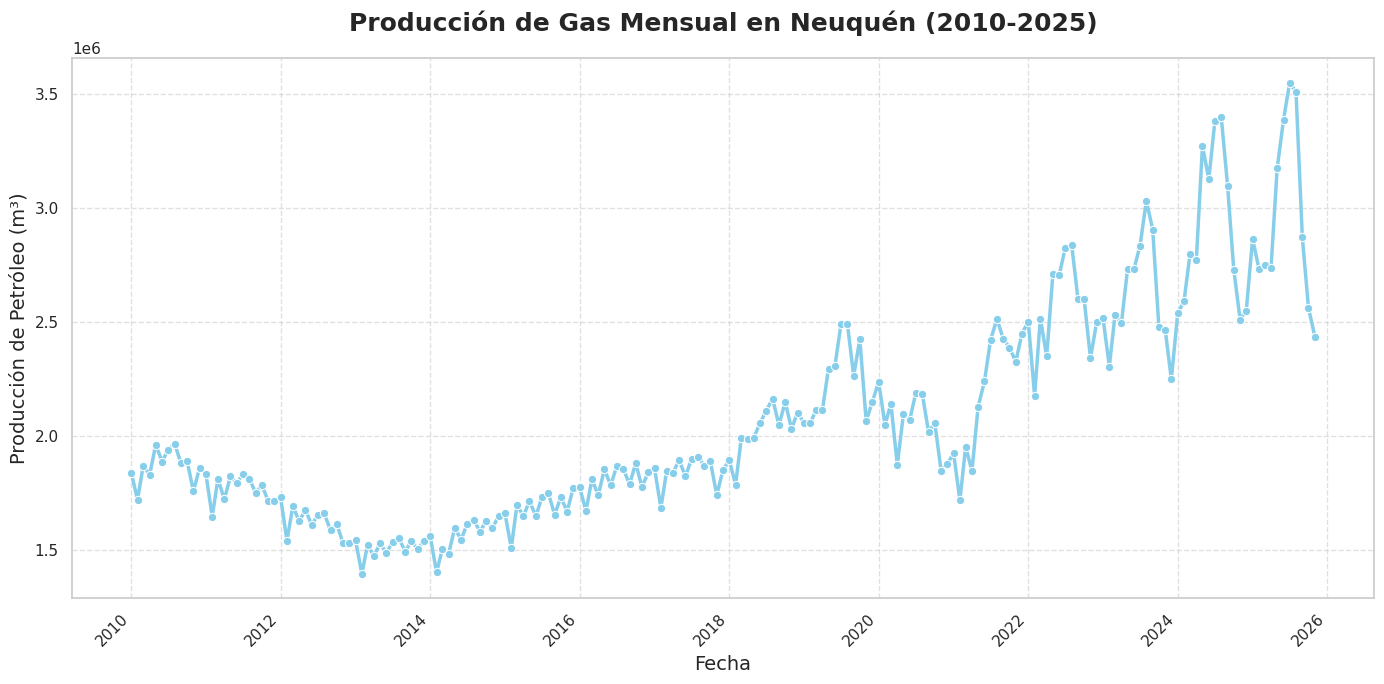

In [17]:
# 1. Agrupar la producción de gas por año y mes
prod_gas_mensual = df_final.groupby(['anio', 'mes'])['prod_gas'].sum().reset_index()

# 2. Crear una columna de fecha para el eje X
prod_gas_mensual['fecha'] = pd.to_datetime(prod_gas_mensual['anio'].astype(str) + '-' + prod_gas_mensual['mes'].astype(str) + '-01')

# 3. Ordenar por fecha para asegurar la correcta visualización de la serie temporal
prod_gas_mensual = prod_gas_mensual.sort_values('fecha')

# 4. Configurar el estilo del gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# 5. Crear el gráfico de línea
sns.lineplot(x='fecha', y='prod_gas', data=prod_gas_mensual, marker='o', color='skyblue', linewidth=2.5)

# 6. Personalizar el gráfico
plt.title('Producción de Gas Mensual en Neuquén (2010-2025)', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Producción de Petróleo (m³)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 5 productoras de Gas 2010-2025

In [18]:

top5_prod_gas_companies = df_final.groupby('empresa')['prod_gas'].sum().nlargest(5).reset_index()
top5_prod_gas_companies

,empresa,prod_gas
0,YPF S.A.,"153,845,430.21"
1,TOTAL AUSTRAL S.A.,"81,860,576.25"
2,TECPETROL S.A.,"40,942,798.27"
3,PLUSPETROL S.A.,"25,378,695.79"
4,PAMPA ENERGIA S.A.,"23,709,311.69"


### Grafico-Top 5 productoras de Gas 2010-2025

/tmp/ipython-input-1779257772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y = "empresa", x = "prod_gas", data = top5_prod_gas_companies, palette="viridis")


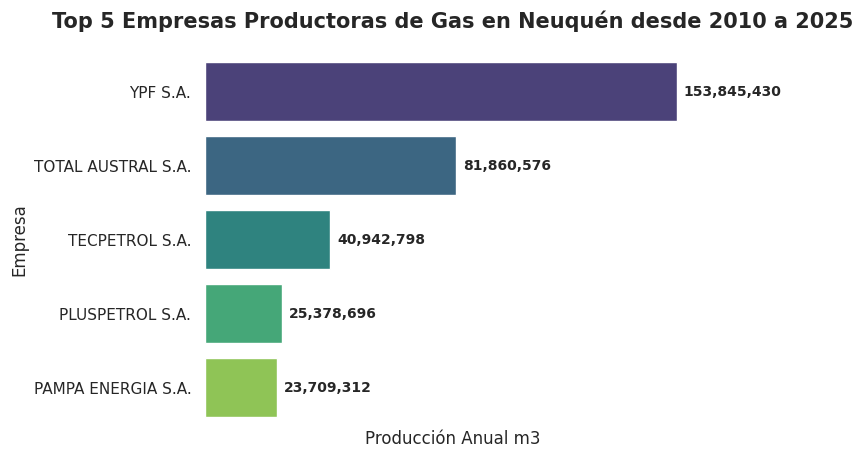

In [19]:
# Gráfico de barras
ax=sns.barplot(y = "empresa", x = "prod_gas", data = top5_prod_gas_companies, palette="viridis")
plt.title('Top 5 Empresas Productoras de Gas en Neuquén desde 2010 a 2025', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Producción Anual m3', fontsize=12)
plt.ylabel('Empresa', fontsize=12)

# Añadir las etiquetas de datos al final de cada barra para mayor claridad
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, fontweight='bold')


ax.set_xticks([]) # Borra los números del eje X
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
sns.despine(left=True, bottom=True)

#Analisis tipo de recurso

### Variables a tener en cuenta para exportar

####Se tiene en cuenta valores totales por pozo para poder representarlo en PowerBI

In [20]:
df_final.columns

Index(['anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua',
       'iny_agua', 'iny_gas', 'tef', 'tipoextraccion', 'tipoestado',
       'tipopozo', 'empresa', 'profundidad', 'formacion', 'areayacimiento',
       'cuenca', 'provincia', 'tipo_de_recurso', 'dias_mes', 'eficiencia_op'],
      dtype='object')

In [21]:
df_final["prod_barril_pet_indv"]= (df_final["prod_pet"]*6.29)
df_final['water_cut']= (df_final['prod_agua']/df_final['prod_pet']+df_final['prod_agua'])*100


#Exportacion para Power BI

In [22]:
# Columna fecha
df_final['fecha'] = pd.to_datetime(df_final['anio'].astype(str) + '-' + df_final['mes'].astype(str) + '-01')

#Chequeo de datos enteros
df_final['anio'] = df_final['anio'].astype(int)
df_final['mes'] = df_final['mes'].astype(int)

# Instalamos la librería pyarrow o fastparquet que es mas rapido que exportar un csv
!pip install pyarrow

#Exportamos
df_final.to_parquet('produccion_neuquen_2010_2025.parquet', index=False)

# Machine Learning - Random Forest


In [23]:
#libreria para ml
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
#Cargamos datos
df_final['caudal_operativo'] = df_final['prod_pet'] / df_final['tef']
df_final=df_final.dropna(subset=['caudal_operativo'])#Limpiamos nulos de tef=0

#Seleccion de features representativas del caudal
X=df_final[['anio','tef','tipo_de_recurso','empresa']]
y=df_final['caudal_operativo']

#Encoding de variables dummys
X=pd.get_dummies(X,columns=['tipo_de_recurso','empresa'])



In [25]:
##TIEMPO DE DEMORA 10-11MIN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1. PREPARACIÓN E INGENIERÍA DE VARIABLES ---
# Trabajamos sobre una copia para no alterar el original
df_ml = df_final.copy()

# Cálculo de Antiguedad (antes de filtrar para no perder el 'mínimo' real)
df_ml['anio_inicio'] = df_ml.groupby('idpozo')['anio'].transform('min')
df_ml['antiguedad'] = df_ml['anio'] - df_ml['anio_inicio']

# Cálculo de Water Cut (proporción de agua sobre el total de fluidos)
df_ml['water_cut'] = df_ml['prod_agua'] / (df_ml['prod_pet'] + df_ml['prod_agua'] + 0.01)

# --- 2. LIMPIEZA  ---
# Filtramos TEF > 1 y pozos sin producción de petróleo
df_ml = df_ml[(df_ml['tef'] > 1) & (df_ml['prod_pet'] > 0)].copy()

# Calculamos la variable objetivo: Caudal Operativo
df_ml['caudal_operativo'] = df_ml['prod_pet'] / df_ml['tef']

# Eliminamos Outliers (Top 1%) para que el modelo no se distraiga con errores de carga
q_limit = df_ml['caudal_operativo'].quantile(0.99)
df_ml = df_ml[df_ml['caudal_operativo'] < q_limit]

# --- 3. SELECCIÓN DE FEATURES Y CATEGORÍAS ---
# Para no crear miles de columnas, agrupamos yacimientos y formaciones poco frecuentes
top_yacimientos = df_ml['areayacimiento'].value_counts().nlargest(20).index
df_ml['yacimiento_top'] = df_ml['areayacimiento'].apply(lambda x: x if x in top_yacimientos else 'Otros')

top_formaciones = df_ml['formacion'].value_counts().nlargest(15).index
df_ml['formacion_top'] = df_ml['formacion'].apply(lambda x: x if x in top_formaciones else 'Otros')

# Definimos las columnas finales para el modelo (X)
columnas_x = [
    'anio', 'antiguedad', 'profundidad', 'water_cut',
    'tipo_de_recurso', 'formacion_top', 'tipoextraccion', 'yacimiento_top'
]

# Creamos X e y (con el truco del logaritmo)
X = pd.get_dummies(df_ml[columnas_x], columns=['tipo_de_recurso', 'formacion_top', 'tipoextraccion', 'yacimiento_top'])
y = np.log1p(df_ml['caudal_operativo'])

# --- 4. ENTRENAMIENTO ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Usamos un bosque un poco más profundo para captar la complejidad
modelo = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
modelo.fit(X_train, y_train)

# --- 5. EVALUACIÓN ---
pred_log = modelo.predict(X_test)
pred_original = np.expm1(pred_log)
y_test_original = np.expm1(y_test)

print("-" * 30)
print(f"Nuevo MAE: {mean_absolute_error(y_test_original, pred_original):.2f} bbl/día")
print(f"Nuevo R2 Score: {r2_score(y_test_original, pred_original):.4f}")
print("-" * 30)

# --- 6. BONUS: IMPORTANCIA DE LAS VARIABLES ---
importances = pd.Series(modelo.feature_importances_, index=X.columns)
print("Top 5 variables más influyentes:")
print(importances.nlargest(5))

------------------------------
Nuevo MAE: 1.94 bbl/día
Nuevo R2 Score: 0.8051
------------------------------
Top 5 variables más influyentes:
profundidad                  0.45
water_cut                    0.17
antiguedad                   0.08
yacimiento_top_EL SALITRAL   0.04
anio                         0.03
dtype: float64


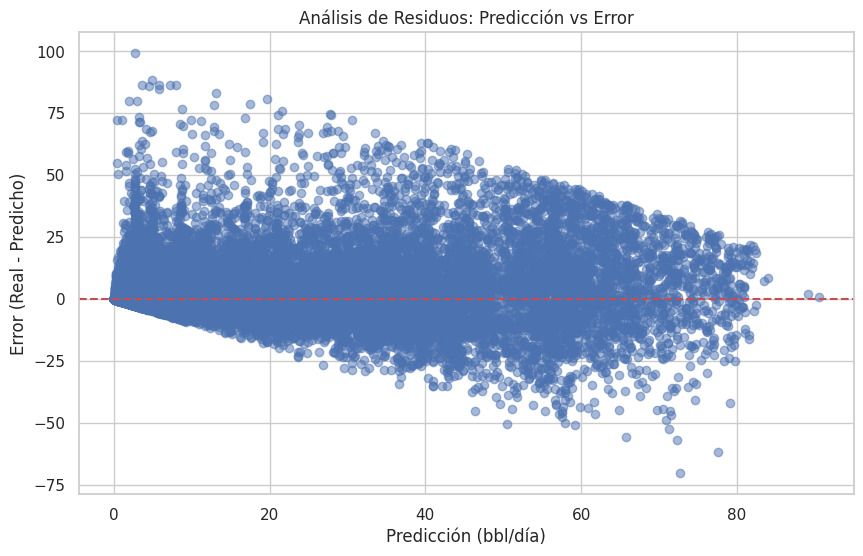

In [26]:
# Gráfico de Residuos
plt.figure(figsize=(10,6))
residuos = y_test_original - pred_original
plt.scatter(pred_original, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análisis de Residuos: Predicción vs Error')
plt.xlabel('Predicción (bbl/día)')
plt.ylabel('Error (Real - Predicho)')
plt.show()

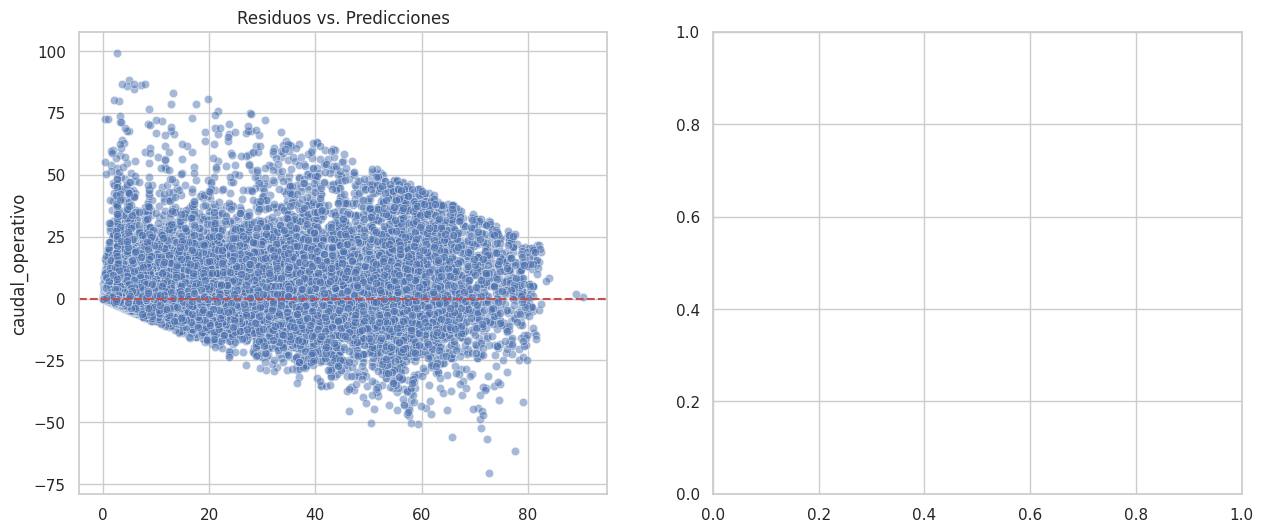

In [27]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 1. Scatter de Residuos
sns.scatterplot(x=pred_original, y=residuos, alpha=0.5, ax=ax[0])
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].set_title('Residuos vs. Predicciones')


plt.show()